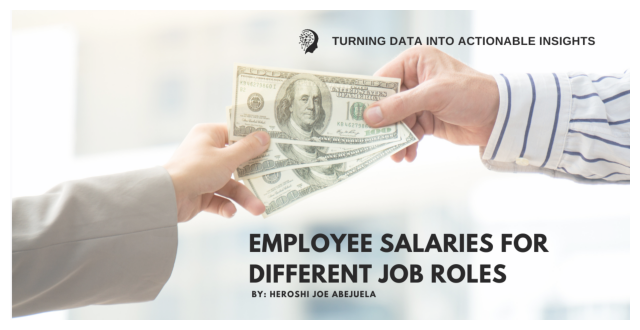

In [71]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = '/content/EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES.png'
image = Image.open(image_path)


plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

### **EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES**

In today’s competitive job market, understanding salary trends and the factors influencing compensation is crucial for both job seekers and employers. This analysis focuses on the salaries associated with various job roles, experience levels, employment types, company sizes, and regional variations. By examining these factors, we aim to provide insights that can inform career decisions and hiring strategies.

### **Background of the Study**

The landscape of employment has evolved significantly in recent years, influenced by technological advancements, shifts in workplace culture, and the increasing prevalence of remote work. Understanding salary structures in this context is vital for various stakeholders, including job seekers aiming to maximize their earning potential, employers seeking to attract and retain talent, and policymakers concerned with labor market trends.

With the rise of data-centric roles, particularly in fields like data analytics and machine learning, it is essential to analyze how factors such as experience level, employment type, and geographic location impact salaries. This study leverages a comprehensive dataset to uncover these trends, providing a valuable resource for informed decision-making.

### **Solution**

We conducted a comprehensive analysis of salary data to uncover trends and insights that can benefit both job seekers and employers. Our solution involves:

1. **Data Analysis**: Utilizing a dataset that includes variables such as experience level, employment type, job title, and regional salary differences, we performed detailed analyses to identify key trends.

2. **Visualization**: We created visual representations of the data to effectively communicate our findings, making it easier for stakeholders to understand the relationships between various factors and salary outcomes.

3. **Recommendations**: Based on our findings, we provided actionable recommendations for job seekers, employers, and policymakers to enhance decision-making in the hiring process and career development.

In [42]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
#Download Data Set
!kaggle datasets download -d inductiveanks/employee-salaries-for-different-job-roles

Dataset URL: https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles
License(s): other
  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 10.1MB/s]


In [2]:
#Unzip Data Set
!unzip /content/employee-salaries-for-different-job-roles.zip -d /content/data

Archive:  /content/employee-salaries-for-different-job-roles.zip
  inflating: /content/data/ds_salaries.csv  


In [4]:
#Load Data Set
import pandas as pd
df = pd.read_csv('/content/data/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#Explore Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
#Descriptive Statistics
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
#Drop Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


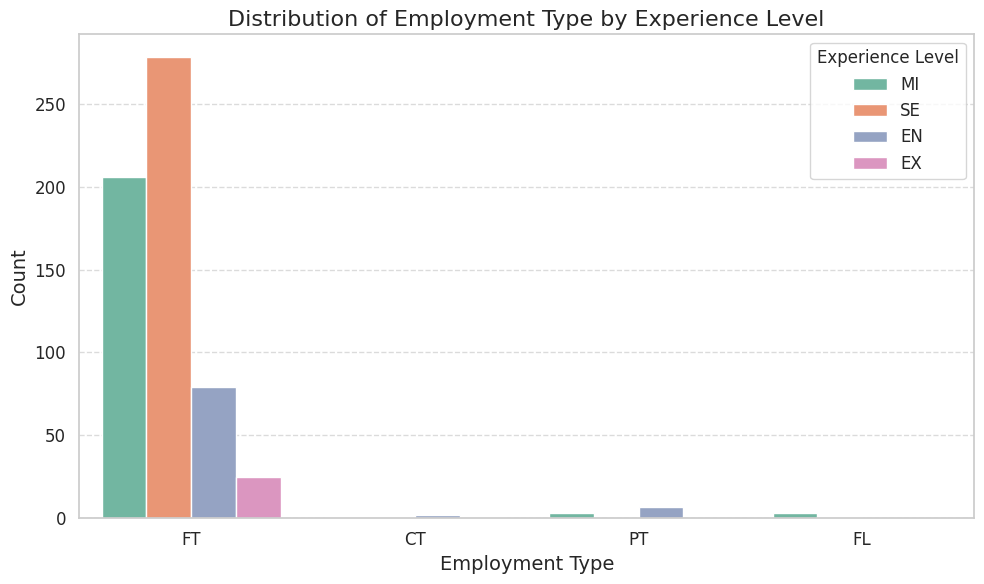

In [66]:
# Create the plot
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='employment_type', hue='experience_level', data=df, palette='Set2')

# Add titles and labels
plt.title('Distribution of Employment Type by Experience Level', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Experience Level', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**Employment Type**
- FT -  Full Time
- CT - Contract
- PT - Part Time
- FL - Freelance

**Experience Level**
- MI - Mid Level
- SE - Senior Level
- EN - Entry Level
- EX - Executive Level

**Interpretation**
- The graph illustrates that **Full Time (FT)** employment has the highest number of employees across various experience levels. Notably, **Senior Level (SE)** workers are predominantly in Full Time positions compared to other employment types.
- This trend suggests that the majority of Senior Level professionals prefer or are more likely to be in Full Time roles, indicating a possible correlation between experience level and the stability offered by Full Time contracts.
- In contrast, **Contract (CT)**, **Part Time (PT)**, and **Freelance (FL)** roles show fewer Senior Level employees, highlighting a preference for Full Time employment among those with more experience.

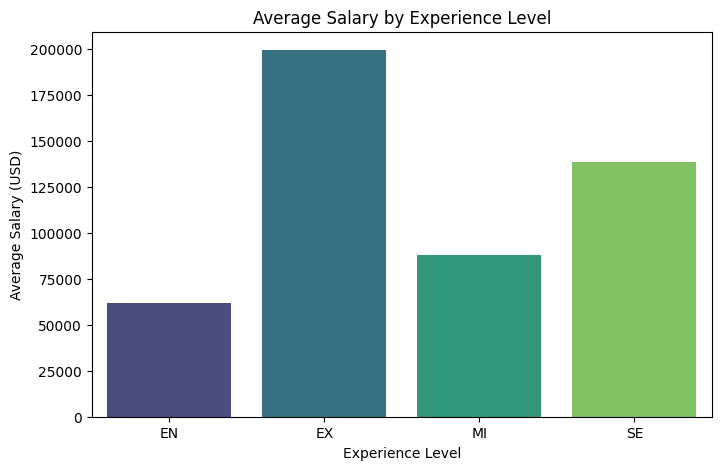

In [53]:
# Average salary by experience level
experience_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Plotting salary by experience level
plt.figure(figsize=(8, 5))
sns.barplot(data=experience_salary, x='experience_level', y='salary_in_usd', palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

**Interpretation**
- The data shows average salaries in USD for various experience levels:

1. **Entry Level (EN)**: 61,643.32
2. **Mid Level (MI)**: 87,996.06
3. **Senior Level (SE)**: 138,617.29
4. **Executive Level (EX)**: 199,392.04

**In summary**
- As experience increases, average salaries rise, indicating that higher experience levels lead to greater compensation in the job market.

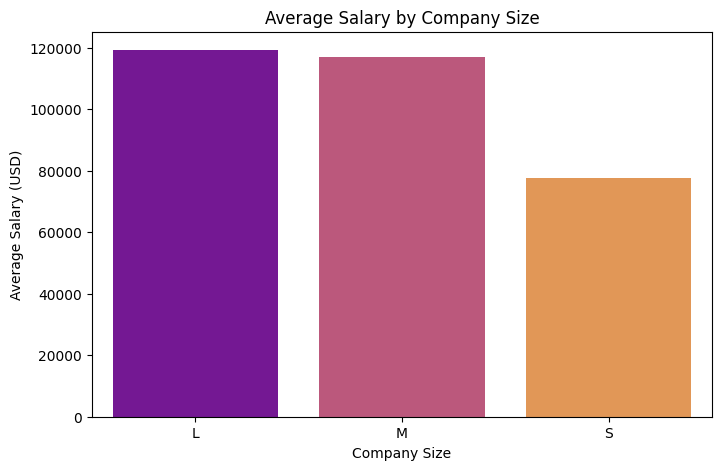

In [52]:
# Average salary by company size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Plotting salary by company size
plt.figure(figsize=(8, 5))
sns.barplot(data=company_size_salary, x='company_size', y='salary_in_usd', palette='plasma')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.show()

**Interpretation**

The data shows average salaries in USD based on company size:

1. **Large Companies (L)**: 119,242.99
2. **Medium Companies (M)**: 116,905.47
3. **Small Companies (S)**: 77,632.67

**In summary**
- Employees in large companies earn the highest average salaries, followed closely by those in medium companies, while small companies offer significantly lower average salaries.

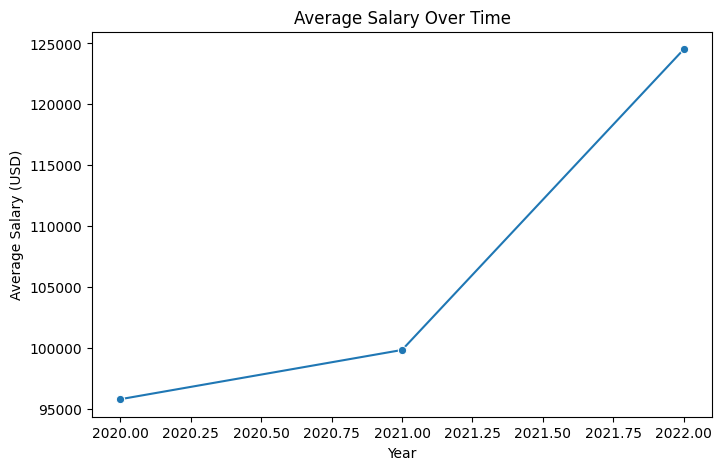

In [16]:
# Average salary by work year
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plotting salary trends over time
plt.figure(figsize=(8, 5))
sns.lineplot(data=salary_by_year, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

**Interpretation**

The data shows average salaries in USD over the years:

1. **2020**: 95,813.00
2. **2021**: 99,853.79
3. **2022**: 124,522.01

**In Summary**
- Average salaries have steadily increased each year, indicating a positive trend in compensation over time.

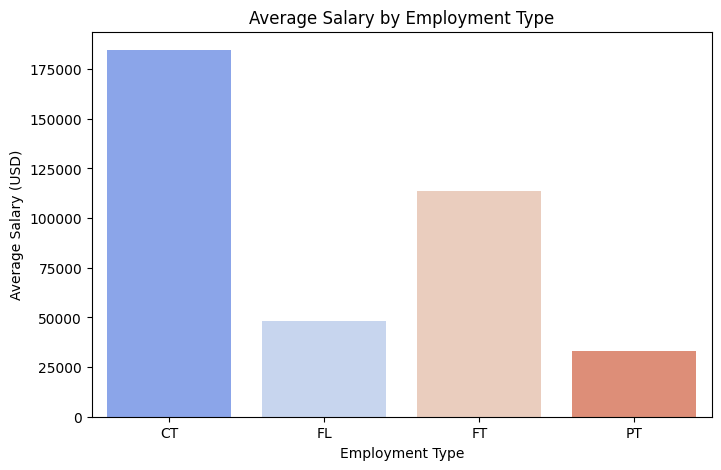

In [33]:
# Average salary by employment type
employment_salary = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Plotting salary by employment type
plt.figure(figsize=(8, 5))
sns.barplot(data=employment_salary, x='employment_type', y='salary_in_usd', palette='coolwarm')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

**Interpretation**

The data shows average salaries in USD based on employment type:

1. **Contract (CT)**: 184,575.00
2. **Full-Time (FT)**: 113,468.07
3. **Freelance (FL)**: 48,000.00
4. **Part-Time (PT)**: 33,070.50

**In summary**
- Contract positions offer the highest average salaries, followed by full-time roles, while freelance and part-time positions have significantly lower average salaries.

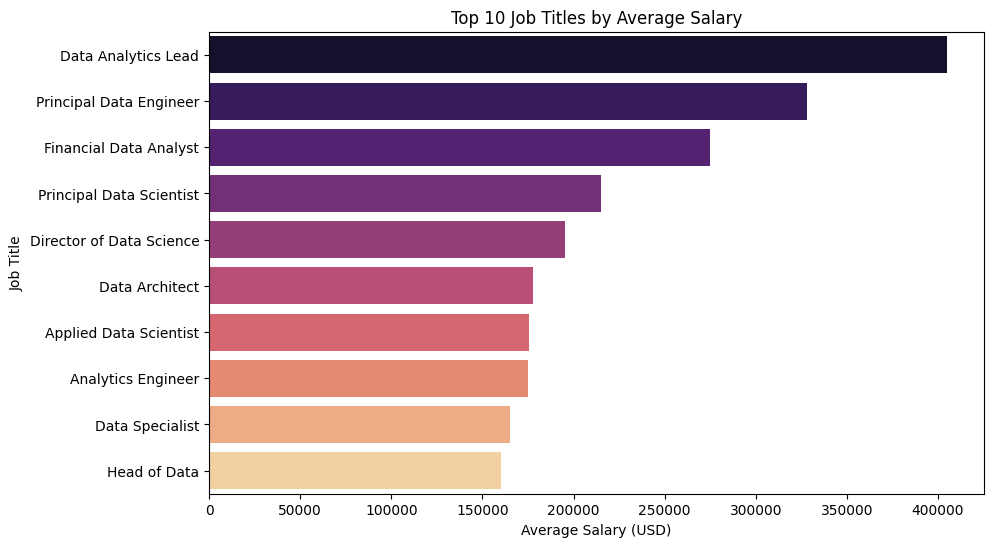

In [34]:
# Top 10 job titles by salary
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10).reset_index()

# Plotting top 10 job titles by salary
plt.figure(figsize=(10, 6))
sns.barplot(data=top_jobs, x='salary_in_usd', y='job_title', palette='magma')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

**Interpretation**

The data shows average salaries in USD for various job titles:

1. **Data Analytics Lead**: 405,000.00
2. **Principal Data Engineer**: 328,333.33
3. **Financial Data Analyst**: 275,000.00
4. **Principal Data Scientist**: 215,242.43
5. **Director of Data Science**: 195,074.00
6. **Data Architect**: 177,873.91
7. **Applied Data Scientist**: 175,655.00
8. **Analytics Engineer**: 175,000.00
9. **Data Specialist**: 165,000.00
10. **Head of Data**: 160,162.60

**In summary**
- The **Data Analytics Lead** position commands the highest average salary, significantly surpassing other roles. Salaries generally decrease as you move down the list, with financial and engineering roles also offering high compensation.

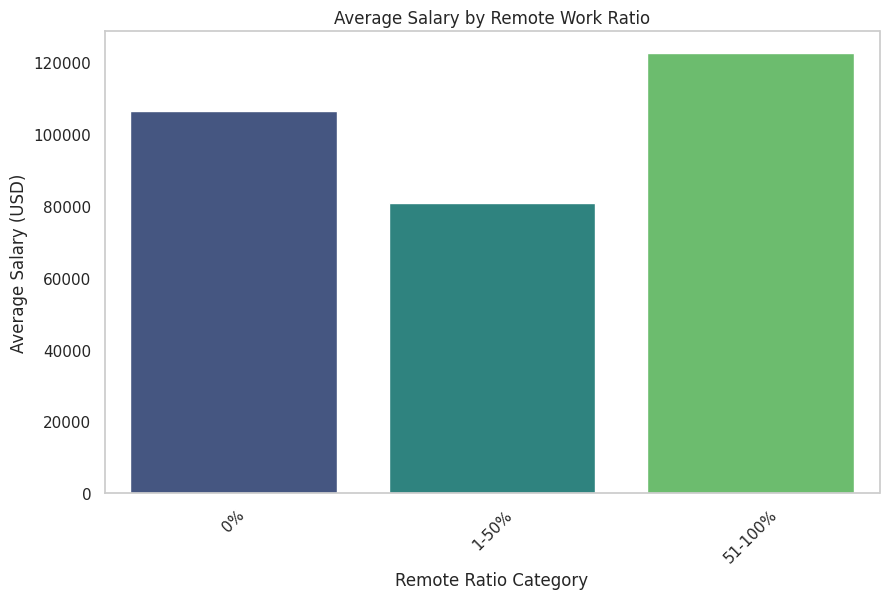

In [65]:
# Plot the average salaries by remote ratio category
plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_df, x='Remote Ratio Category', y='Average Salary (USD)', palette='viridis')
plt.title('Average Salary by Remote Work Ratio')
plt.xlabel('Remote Ratio Category')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [61]:
# Bin remote_ratio into categories
df['remote_category'] = pd.cut(df['remote_ratio'], bins=[-1, 0, 50, 100], labels=['0%', '1-50%', '51-100%'])

# Calculate average salary by remote category
average_salary_df = df.groupby('remote_category')['salary_in_usd'].mean().reset_index()

# Rename columns for clarity
average_salary_df.columns = ['Remote Ratio Category', 'Average Salary (USD)']

# Display the new DataFrame
print(average_salary_df)

  Remote Ratio Category  Average Salary (USD)
0                    0%         106354.622047
1                 1-50%          80823.030303
2               51-100%         122457.454068


**Interpretation**

- **0% Remote Work**: Employees with no remote work options have an average salary of **$106,354.62**. This indicates a strong compensation level for in-office positions.
  
- **1-50% Remote Work**: Those allowed to work remotely part-time earn an average salary of **$80,823.03**, reflecting a notable decrease in compensation compared to fully in-office roles.

- **51-100% Remote Work**: Employees with the ability to work mostly remotely earn the highest average salary at **$122,457.45**. This suggests that greater flexibility in work arrangements is associated with higher pay.

**In summary**
- The data reveals a correlation between remote work options and salary levels: fully in-office roles tend to offer higher salaries, while part-time remote positions see a drop in compensation, whereas predominantly remote roles attract the highest salaries. This could reflect market demands for skilled workers in flexible roles.

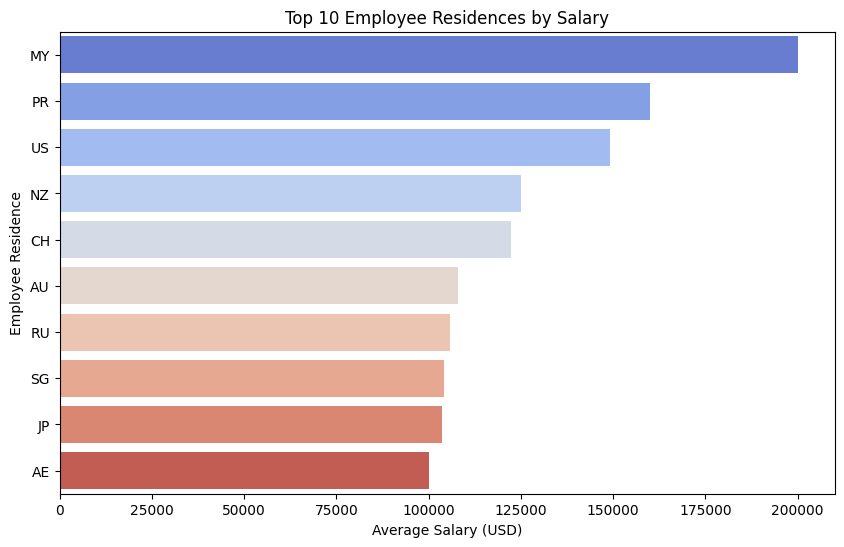

In [40]:
# Average salary by employee residence (top 10 locations)
top_locations = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10).reset_index()

# Plotting top 10 employee residence by salary
plt.figure(figsize=(10, 6))
sns.barplot(data=top_locations, x='salary_in_usd', y='employee_residence', palette='coolwarm')
plt.title('Top 10 Employee Residences by Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Employee Residence')
plt.show()

**Interpretation**

- **Malaysia (MY)**: Employees earn the highest average salary of **200,000.00**.
- **Puerto Rico (PR)**: The average salary is **160,000.00**, indicating strong compensation.
- **United States (US)**: Average salaries are around **149,194.12**, showing competitive earnings.
- **New Zealand (NZ)**: Average salary stands at **125,000.00**.
- **Switzerland (CH)**: Employees earn an average of **122,346.00**, reflecting high living costs.
- **Australia (AU)**: Average salary is **108,042.67**, suggesting strong market demand.
- **Russia (RU)**: The average salary is **105,750.00**.
- **Singapore (SG)**: Average salary is approximately **104,176.50**.
- **Japan (JP)**: Employees earn around **103,537.71**.
- **United Arab Emirates (AE)**: Average salary is **100,000.00**.

**In summary**
- The data highlights significant variations in average salaries based on employee residence, with Malaysia leading in compensation. Other regions like Puerto Rico and the United States also show high salaries, while salaries decrease as you move down the list. This pattern suggests regional economic differences and varying demand for skilled labor across countries.

### **Summary of Findings**

1. **Employment Type**: Full-Time positions dominate across experience levels, particularly among Senior Level employees, indicating a strong preference for stability in higher roles.

2. **Experience Level**: Salaries increase with experience, highlighting the value of expertise in the job market.

3. **Company Size**: Employees at large companies earn the highest average salaries, suggesting better compensation packages compared to smaller firms.

4. **Salary Trends Over Years**: There has been a steady increase in average salaries over the years, reflecting a positive trend in compensation.

5. **Employment Type and Salary**: Contract roles offer the highest salaries, while freelance and part-time positions tend to have significantly lower compensation.

6. **Job Title Analysis**: Certain job titles, particularly in data analytics and engineering, command very high salaries, indicating a competitive market for these roles.

7. **Remote Work and Salary**: Greater flexibility in remote work correlates with higher salaries, suggesting demand for skilled labor in flexible positions.

8. **Regional Salary Variations**: There are significant disparities in average salaries based on employee residence, with Malaysia offering the highest compensation.

### **Conclusion**

The analysis reveals that experience, employment type, and company size significantly influence salary levels in the job market. There is a clear trend that higher experience correlates with greater compensation, while contract roles tend to offer better pay than traditional full-time positions. Additionally, the ability to work remotely is increasingly associated with higher salaries, reflecting changing workplace dynamics.

### **Recommendations**

1. **For Job Seekers**:
   - Consider pursuing full-time roles, especially at larger companies, to maximize earning potential.
   - Seek opportunities for skill development and advancement to transition into higher experience levels.

2. **For Employers**:
   - Offer competitive salaries and flexible work arrangements to attract and retain top talent, particularly for in-demand roles such as data analytics and engineering.
   - Consider the impact of company size on salary competitiveness to ensure attractive compensation packages.

3. **For Policy Makers**:
   - Promote initiatives that support remote work, which could enhance job satisfaction and potentially increase salaries across sectors.
   - Encourage companies, especially smaller ones, to provide training and development resources to elevate their workforce and improve salary standards.

4. **For Future Research**:
   - Investigate the long-term trends of salary growth in relation to emerging job markets and the impact of technological advancements on job roles and compensation.

By addressing these areas, stakeholders can better navigate the evolving landscape of employment and compensation.

### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!